# Data processing & The definition of indices

In [1]:
import sys
sys.path.insert(0, '../../_libs/')
import NEMO_tools as Nts
import Atmos_tools as Ats

In [2]:
import glob
import cartopy
import datetime
import scipy.io
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as patches
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [3]:
from dateutil.relativedelta import relativedelta

base = datetime.datetime(2002, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(144)]

In [4]:
def interp_np(xin, yin, zin, xout, yout):
    zout = Nts.reporj_NEMOgrid(xin, yin, zin, xout, yout, method='linear')
    zfill = Nts.reporj_NEMOgrid(xin, yin, zin, xout, yout, method='nearest')
    zout[np.isnan(zout)] = zfill[np.isnan(zout)]
    #zout[yout>89.99] = np.nan
    return zout

In [5]:
coordinate_name=glob.glob('../../_data/Exchange/mesh_zgr.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]
deptht = coordinate_obj.variables['nav_lev'][:]
deltat = np.zeros(deptht.shape)
deltat[1:] = np.diff(deptht)
deltat[0] = deptht[0]

In [6]:
# For weighting vals with delta-t
FName = '/ocean/yingkai/GEOTRACES/BASE04_1m_20020101_20131231_ptrc_T.nc'
ptrc_obj = nc.Dataset(FName)
gridT_mask = ptrc_obj.variables['Ba'][0, :, :, :]
gridT_mask[gridT_mask==0]=np.nan
gridT_mask[~np.isnan(gridT_mask)]=1

deptht_mask = np.zeros(gridT_mask.shape)
for i in range(50):
    deptht_mask[i, :, :] = gridT_mask[i, :, :]*deltat[i]
    
deptht_num_mask = np.nansum(gridT_mask[:24, :, :], 0)
deptht_mask = np.nansum(deptht_mask[:24, :, :], 0)
deptht_mask[deptht_mask==0]=np.nan

In [7]:
ra_obj = nc.Dataset('../../_data/Exchange/RotatedAngle_ANHA4.nc')
gsint = ra_obj.variables['gsint'][:]
gcost = ra_obj.variables['gcost'][:]

In [8]:
ocean_x = np.linspace(-180, 180, 140)
ocean_y = np.linspace(20, 90, 140)
ocean_lon, ocean_lat = np.meshgrid(ocean_x, ocean_y)

# Data processing

## Zonal/Meridional Currents

In [9]:
#UName = sorted(glob.glob('../../_data/MAT files/vozocrtx_by_month/vozocrtx*mat'))
#VName = sorted(glob.glob('../../_data/MAT files/vomecrty_by_month/vomecrty*mat'))

In [10]:
#vozocrtx = np.zeros([144, 800, 544])
#vomecrty = np.zeros([144, 800, 544])
#for i in range(144):
#    print(i)
#    # read u
#    UMAT = scipy.io.loadmat(UName[i])
#    vz = UMAT['vozocrtx'][:]
#    vz[vz>1e7] = np.nan
#    for j1 in range(24):
#        vz[j1, :, :] = vz[j1, :, :]*deltat[j1]
#    vz0 = np.nansum(vz[:24, :, :], 0)/deptht_mask
#    # read v
#    VMAT = scipy.io.loadmat(VName[i])
#    vm = VMAT['vomecrty'][:]
#    vm[vm>1e7] = np.nan
#    for j2 in range(24):
#        vm[j2, :, :] = vm[j2, :, :]*deltat[j2]
#    vm0 = np.nansum(vm[:24, :, :], 0)/deptht_mask
#    # rotate
#    vz0[:, 1:] = 0.5*(vz0[:, 0:-1] + vz0[:, 1:])
#    vm0[1:, :] = 0.5*(vm0[0:-1, :] + vm0[1:, :])
#    u_rot = vz0*gcost - vm0*gsint
#    v_rot = vm0*gcost + vz0*gsint
#    # store
#    vozocrtx[i, :, :] = u_rot
#    vomecrty[i, :, :] = v_rot

In [11]:
#save_var = {'vozocrtx':vozocrtx, 'vomecrty':vomecrty}
#scipy.io.savemat('../../_data/Exchange/UV_current_d23.mat', mdict=save_var)

In [1]:
#SName = sorted(glob.glob('../../_data/MAT files/vosaline_by_month/vosaline*mat'))
#saline = np.zeros([144, 800, 544])
#for time in range(144):
#    print time
#    saline_temp = scipy.io.loadmat(SName[time])['vosaline'][:]
#    for i in range(24):
#        saline[time, :, :] += saline_temp[i, :, :]*deltat[i]
#    saline[time, :, :] = saline[time, :, :]/deptht_mask

In [2]:
#save_var = {'vosaline':saline}
#scipy.io.savemat('../../_data/Exchange/vosaline_d23.mat', mdict=save_var)

## Wind stress

In [12]:
#taux_obj=nc.Dataset('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/sozotaux_monmean.nc')
#taux = taux_obj.variables['sozotaux'][:]
#tauy_obj=nc.Dataset('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/sometauy_monmean.nc')
#tauy = tauy_obj.variables['sometauy'][:]
#taux[np.abs(taux)>100] = np.nan
#tauy[np.abs(tauy)>100] = np.nan

In [13]:
#u_rot = np.zeros(taux.shape)
#v_rot = np.zeros(tauy.shape)
#taux0 = np.copy(taux); taux0[:, :, 1:] = 0.5*(taux[:, :, 0:-1] + taux[:, :, 1:])
#tauy0 = np.copy(tauy); tauy0[:, 1:, :] = 0.5*(tauy[:, 0:-1, :] + tauy[:, 1:, :])
#for i in range(144):
#    u_rot[i, :, :] = taux0[i, :, :]*gcost - tauy0[i, :, :]*gsint
#    v_rot[i, :, :] = tauy0[i, :, :]*gcost + taux0[i, :, :]*gsint

In [14]:
#save_var = {'taux':u_rot, 'tauy':v_rot}
#scipy.io.savemat('../../_data/MAT files/windstress_tau.mat', mdict=save_var)

## Freshwater content

In [15]:
#SName = sorted(glob.glob('../../_data/MAT files/vosaline_by_month/vosaline*mat'))
#FWC = np.zeros([800, 544])
#FWC[FWC==0]=np.nan
#print('allocation done')
## Loops
#for time in range(144):
#    vosaline = scipy.io.loadmat(SName[time])['vosaline'][:]
#    for i in range(800):
#        for j in range(544):
#            if(domain[i, j]!=0):
#                #print('Catch: {}, {}'.format(i, j))
#                FWC[i, j] = fwc_1d(vosaline[:24, i, j], deptht[:24], Sref=34.8)
#                # Save
#    save_var = { 'FWC': FWC}
#    scipy.io.savemat('../../_data/MAT files/FWC/FWC_ANHA4_d23'+format(time, '03d')+'.mat', mdict=save_var)
#    
#    print('FWC_ANHA4_d23'+format(time, '03d')+'.mat')

In [16]:
#FWC_name = sorted(glob.glob('../../_data/MAT files/FWC/FWC_ANHA4_d23*.mat'))
#FWC = np.zeros([144, 800, 544])
#
#for i in range(144):
#    MAT = scipy.io.loadmat(FWC_name[i])
#    FWC[i, :, :] = MAT['FWC'][:]
#    
#save_var = { 'FWC': FWC}
#scipy.io.savemat('../../_data/MAT files/FWC/FWC_EOF.mat', mdict=save_var)

## emps

In [17]:
#safl_name = '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/iocesafl_monmean.nc'
#sss_name  = '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/isssalin_monmean.nc'
#safl_obj = nc.Dataset(safl_name)
#safl = safl_obj.variables['iocesafl'][:]; safl[np.abs(safl)>100]=np.nan
#sss_obj = nc.Dataset(sss_name)
#sss = sss_obj.variables['isssalin'][:]; sss[np.abs(sss)>100]=np.nan
#emps=-1.0*safl*34.7/(3600.0*24*(sss+1.0e-16))

In [18]:
#emps[np.abs(emps)>100]=np.nan
#save_var = {'emps':emps}
#scipy.io.savemat('../../_data/Exchange/emps.mat', mdict=save_var)

## GDPS Atmospheric data 

In [19]:
## GDPS-SLP
#year = np.arange(2002, 2014)
#slp = np.empty([144, 368, 801])
#for i in range(12):
#    name = glob.glob('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/GDPS/*slp*'+str(year[i])+'*monmean*')
#    slp_obj = nc.Dataset(name[0])
#    slp[i*12:(i+1)*12, :, :] = slp_obj.variables['atmpres'][:, :, :]
## GDPS-U10
#u10 = np.empty([144, 368, 801])
#for i in range(12):
#    name = glob.glob('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/GDPS/*u10*'+str(year[i])+'*monmean*')
#    u10_obj = nc.Dataset(name[0])
#    u10[i*12:(i+1)*12, :, :] = u10_obj.variables['u_wind'][:, :, :]
## GDPS-V10
#v10 = np.empty([144, 368, 801])
#for i in range(12):
#    name = glob.glob('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/GDPS/*v10*'+str(year[i])+'*monmean*')
#    v10_obj = nc.Dataset(name[0])
#    v10[i*12:(i+1)*12, :, :] = v10_obj.variables['v_wind'][:, :, :]
## GDPS-T2
#t2 = np.empty([144, 368, 801])
#for i in range(12):
#    name = glob.glob('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/GDPS/*t2*'+str(year[i])+'*monmean*')
#    t2_obj = nc.Dataset(name[0])
#    t2[i*12:(i+1)*12, :, :] = t2_obj.variables['tair'][:, :, :]
## Lat/Lon corrd.    
#x = slp_obj.variables['LON'][:]
#y = slp_obj.variables['LAT'][:]
#[slp_lon, slp_lat] = np.meshgrid(x, y)
#slp_lon = slp_lon[y>20, :]
#slp_lat = slp_lat[y>20, :]
## Cut Polar-ward 20degN
#slp = slp[:, y>20, :]/100.0
#u10 = u10[:, y>20, :]
#v10 = v10[:, y>20, :]
#t2 = t2[:, y>20, :]

In [20]:
#save_var = {'lon':slp_lon, 'lat':slp_lat,
#            'slp':slp, 't2':t2, 'u10':u10, 'v10':v10}
#scipy.io.savemat('../../_data/Exchange/GDPS_Atmos.mat', mdict=save_var)

## CCAR Tracer modelling

In [25]:
# FName = '/ocean/yingkai/GEOTRACES/BASE04_1m_20020101_20131231_ptrc_T.nc'
# ptrc_obj = nc.Dataset(FName)
# Ba = np.zeros([144, 800, 544])
# print('Dissolved Barium')
# for i in range(24):
#     print(i)
#     Ba += ptrc_obj.variables['Ba'][:, i, :, :]*deltat[i]
# Ba[Ba==0]=np.nan
# Ba = Ba/deptht_mask
# print('Oxygen Isotope Ratio')
# #d18O = ptrc_obj.variables['d18O'][:, 0, :, :]
# d18O = np.zeros([144, 800, 544])
# for i in range(24):
#     print(i)
#     d18O += ptrc_obj.variables['d18O'][:, i, :, :]*deltat[i]
# d18O[np.isnan(Ba)]=np.nan
# d18O = d18O/deptht_mask

In [ ]:
# FName = '/ocean/yingkai/GEOTRACES/BASE04_1m_20020101_20131231_ptrc_T.nc'
# ptrc_obj = nc.Dataset(FName)
# Ba = np.zeros([144, 800, 544])
# print('Dissolved Barium')
# for i in range(24):
#     print(i)
#     Ba += ptrc_obj.variables['Ba'][:, i, :, :]*deltat[i]
# Ba[Ba==0]=np.nan
# Ba = Ba/deptht_mask
# print('Oxygen Isotope Ratio')
# d18O = ptrc_obj.variables['d18O'][:, 0, :, :]

# d18O[np.isnan(Ba)]=np.nan
# d18O = d18O/deptht_mask

In [22]:
# save_var = { 'Ba'  : Ba, 'd18O': d18O}
# scipy.io.savemat('../../_data/MAT files/BASE04_tracer_vals_ana2.mat', mdict=save_var)

# Definition of indices

In [18]:
#MAT = scipy.io.loadmat('../../_data/Mask files/velocity_driven_transport_mask.mat')
#vdt_mask = MAT['mask_arctic'][:]
#lon_mask = MAT['lon0'][:]
#lat_mask = MAT['lat0'][:]
#
#mask_interp = Nts.reporj_NEMOgrid(lon_mask, lat_mask, vdt_mask, nav_lon, nav_lat, method='nearest')
#mask_range = Nts.reporj_NEMOgrid(lon_mask, lat_mask, vdt_mask, nav_lon, nav_lat, method='linear')
#mask_interp[np.isnan(mask_range)] = np.nan
#mask_interp[np.isnan(mask_interp)] = 0.0
#
#save_var = { 'nav_lon': nav_lon, 'nav_lat':nav_lat, 'mask_ANHA4':mask_interp}
#scipy.io.savemat('../../_data/MAT files/vdt_BG_mask.mat', mdict=save_var)

In [25]:
MAT = scipy.io.loadmat('../../_data/Mask files/vdt_BG_mask.mat')
vdt_mask = MAT['mask_ANHA4'][:]
vdt_mask_fill = np.copy(vdt_mask)
vdt_mask_fill[vdt_mask_fill==0]=np.nan

In [20]:
MAT = scipy.io.loadmat('../../_data/Exchange/UV_current_d23.mat')
vozocrtx = MAT['vozocrtx'][:]
vomecrty = MAT['vomecrty'][:]
u_mean = np.nanmean(vozocrtx, 0)#; u_mean[u_mean==np.inf] = np.nan
v_mean = np.nanmean(vomecrty, 0)#; v_mean[v_mean==np.inf] = np.nan

/home/yingkai/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [21]:
u_regrid = interp_np(nav_lon, nav_lat, u_mean, ocean_lon, ocean_lat)
v_regrid = interp_np(nav_lon, nav_lat, v_mean, ocean_lon, ocean_lat)

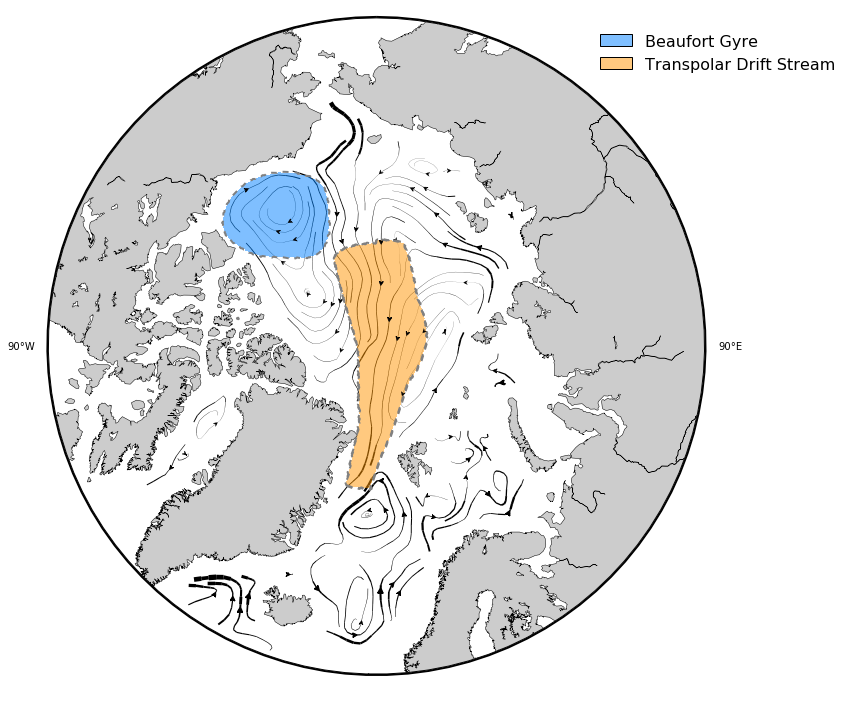

In [39]:
Regions = ['Beaufort Gyre', 'Transpolar Drift Stream']

fig = plt.figure(figsize=(12, 12))

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.49
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax_background = fig.gca()
patch = patches.PathPatch(circle, lw=4)
ax_background.add_patch(patch)
ax_background.axis('off')

ax_proj = fig.gca(projection=cartopy.crs.NorthPolarStereo(0))
ax_proj.set_extent([-180, 180, 60, 90], cartopy.crs.PlateCarree())
ax_proj.set_boundary(circle, transform=ax_proj.transAxes)

proj = Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=0, round=False, ax=ax_proj)
proj.fillcontinents(color='0.8', lake_color=None)
proj.drawcoastlines(linewidth=0.5, color='k')
proj.drawmeridians(np.array([-90, 90]), labels=[1, 1, 1, 1], fontsize=10, latmax=90, linewidth=0)
x0, y0 = proj(nav_lon, nav_lat)

uproj, vproj = proj.rotate_vector(u_regrid, v_regrid, ocean_lon, ocean_lat, returnxy=False)
uproj_rec, x, y = proj.transform_scalar(uproj, ocean_x, ocean_y, 150, 150, returnxy=True)
vproj_rec, _, _ = proj.transform_scalar(vproj, ocean_x, ocean_y, 150, 150, returnxy=True)

speed = np.sqrt(uproj_rec**2 + vproj_rec**2)
lw = 12.5*speed/np.nanmax(speed)

proj.streamplot(x, y, uproj_rec, vproj_rec, density=3, linewidth=lw, color='k', arrowstyle='fancy', arrowsize=1.0)
CS = proj.contourf(x0, y0, vdt_mask_fill, np.array([0, 1, 2]), alpha=0.5)
proj.contour(x0, y0, vdt_mask, [0, 1, 2], linewidths=2.0, linestyles='--', colors='gray', zorder=4)

proxy = [plt.Rectangle((0, 0), 1, 1, fc = pc.get_facecolor()[0]) for pc in CS.collections]
LG = ax_background.legend(proxy, Regions, bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=1, prop={'size':16}); LG.draw_frame(False)
#ax_background.set_title('Arctic Ocean 2002 - 2013 mean flow above 130m', fontsize=16)

## Transpolar drift

### Question: how to estimate the intensity of transpolar drift in the "blue region"

**I tried:**

(**X**) V component heading south --> Wrong

(**X**) Projecting 2d ocean currents to the direction of Fram Strait --> Technical difficulties

(**V**) Speed --> Looks better than I though

In [57]:
u_tpd = vozocrtx0[:, mask_interp==2]
v_tpd = vomecrty0[:, mask_interp==2]
vdt = np.abs(np.nanmean(np.sqrt(u_tpd*u_tpd+v_tpd*v_tpd), 1))
#
#vdt_grid = u_tpd*np.cos(-5.5/180*np.pi) + v_tpd*np.sin(-5.5/180*np.pi)
#vdt = np.abs(np.nanmean(vdt_grid, 1))

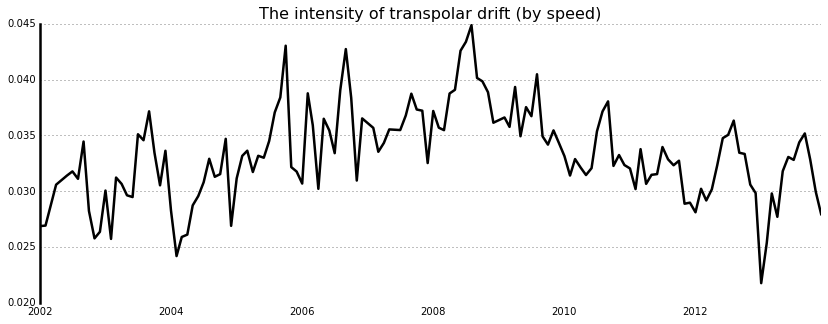

In [73]:
fig = plt.figure(figsize=(14, 5))
ax = fig.gca()

ax.grid(linestyle=':')
ax.xaxis.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False) 
ax.spines["right"].set_visible(False)
ax.set_xlim([date_list[0], date_list[143]])
#ax.set_ylim([0, 0.004])
[i.set_linewidth(2.5) for i in ax.spines.itervalues()] 
ax.tick_params(axis="both", which="both", bottom="off", top="off",    
            labelbottom="on", left="off", right="off", labelleft="on")

ax.plot(date_list, vdt, 'k-', lw=2.5)
ax.set_title('The intensity of transpolar drift (by speed)', fontsize=16)

## Intensity of transpolar drift v.s. SLP

In [59]:
from scipy.stats.stats import pearsonr

In [60]:
corr = np.zeros([233, 801])
p = np.zeros([233, 801])

for i in range(233):
    for j in range(801):
        corr[i, j], p[i, j]=pearsonr(slp_np[:, i, j], vdt)

In [63]:
lev_corr = np.array([-0.5, -0.3, -0.1, 0.1, 0.3, 0.5])
lev_corr_line = np.array([-0.5, -0.3, -0.1, 0, 0.1, 0.3, 0.5])

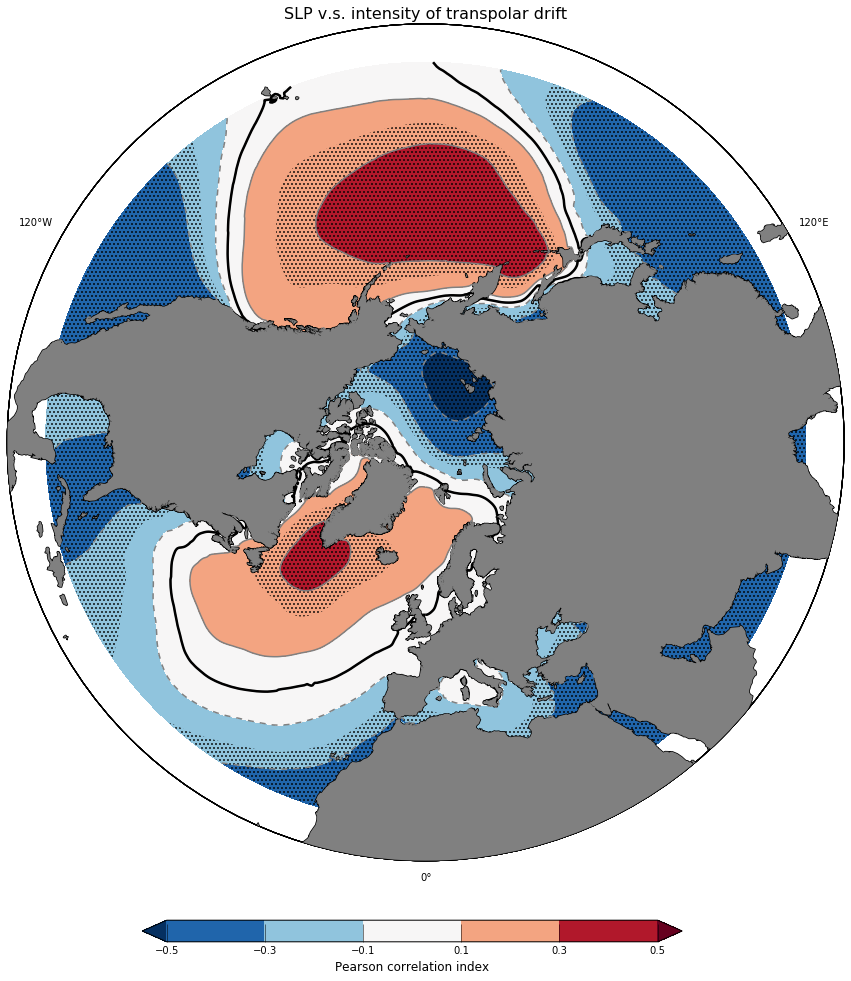

In [64]:
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=15, lon_0=0, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 120), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None, zorder=4)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y = proj(lon_np, lat_np)
CS = proj.contourf(x, y, corr, lev_corr, cmap=plt.cm.RdBu_r, extend='both')
proj.contour(x, y, corr, lev_corr_line, colors=('gray',), linewidths=1.5)
proj.contour(x, y, corr, [0], colors=('k',), linewidths=2.5)
proj.contourf(x, y, p, [0.01, 0.1], colors='none', hatches=['...', ''], extend='min')

cax  = fig.add_axes([0.25, 0.05, 0.5, 0.02])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('Pearson correlation index', fontsize=12)
CBar.ax.tick_params(axis='x', length=18)
CBar.set_ticks(lev_corr)

ax.set_title('SLP v.s. intensity of transpolar drift', fontsize=16)

## Intensity of transpolar drift v.s. $\mathrm{Ba_d}$ (replaced by EOF 2nd mode)

In [44]:
FName = '/ocean/yingkai/GEOTRACES/Simulations/BASE01_1m_20020101_20131231_ptrc_T.nc'
ptrc_obj = nc.Dataset(FName)
Ba = ptrc_obj.variables['Ba'][:, :20, :, :]
Ba[Ba==0]=np.nan
Ba = np.nanmean(Ba, 1)

In [45]:
Ba_np = Ba[:, 350:, :]

In [46]:
Ba_anom = seasonal_decomp3d(Ba_np)

In [47]:
Ba_anom.shape

(144, 450, 544)

In [65]:
corrBa = np.zeros([450, 544])
pBa = np.zeros([450, 544])
for i in range(450):
    for j in range(544):
        corrBa[i, j], pBa[i, j]=pearsonr(Ba_np[:, i, j], vdt[:])

In [66]:
lev_corr = np.array([-0.5, -0.3, -0.1, 0.1, 0.3, 0.5])
lev_corr_line = np.array([-0.5, -0.3, -0.1, 0, 0.1, 0.3, 0.5])

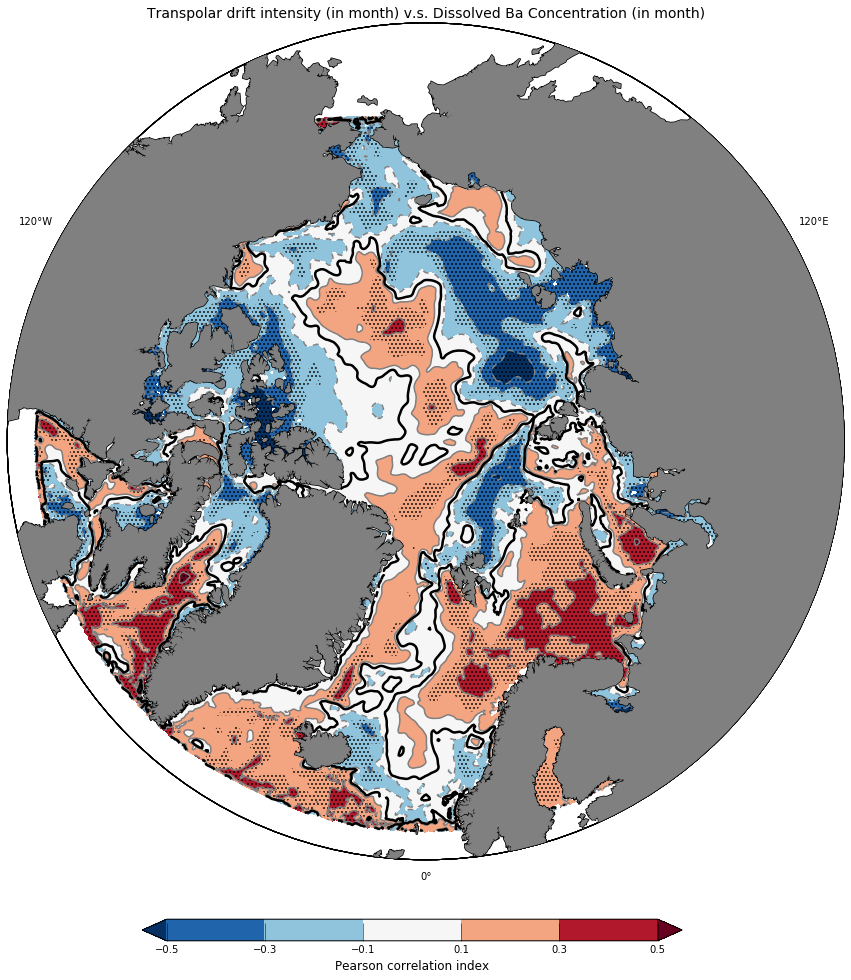

In [67]:
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=58, lon_0=0, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 120), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None, zorder=4)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y = proj(nav_lon, nav_lat)
CS = proj.contourf(x[350:, :], y[350:, :], corrBa, lev_corr, cmap=plt.cm.RdBu_r, extend='both')
proj.contour(x[350:, :], y[350:, :], corrBa, lev_corr_line, colors=('gray',), linewidths=1.5)
proj.contour(x[350:, :], y[350:, :], corrBa, [0], colors=('k',), linewidths=2.5)
proj.contourf(x[350:, :], y[350:, :], pBa, [0.01, 0.1], colors='none', hatches=['...', ''], extend='min')

cax  = fig.add_axes([0.25, 0.05, 0.5, 0.02])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('Pearson correlation index', fontsize=12)
CBar.ax.tick_params(axis='x', length=18)
CBar.set_ticks(lev_corr)

ax.set_title('Transpolar drift intensity (in month) v.s. Dissolved Ba Concentration (in month)', fontsize=14)

## How transpolar drift affects the tracer transport

In [68]:
MAT = scipy.io.loadmat('../../_data/Exchange/Ba_flux_param.mat')

#            'fake_xgridFS':fake_xgridFS, 'dgridFS':dgridFS,
#            'fake_xgridBB':fake_xgridBB, 'dgridBB':dgridBB
#           }
#scipy.io.savemat('../../_data/Exchange/Ba_flux_param.mat', mdict=save_var)


Ba_fluxFS_n = MAT['Ba_fluxFS_n'][:]
Ba_fluxFS_s = np.abs(MAT['Ba_fluxFS_s'][:])
Ba_fluxBB_n = MAT['Ba_fluxBB_n'][:]
Ba_fluxBB_s = np.abs(MAT['Ba_fluxBB_s'][:])

fake_xgridFS = MAT['fake_xgridFS'][:]
fake_xgridBB = MAT['fake_xgridBB'][:]
dgridFS = MAT['dgridFS'][:]
dgridBB = MAT['dgridBB'][:]

xzFS = MAT['xzFS'][:]
xzBB = MAT['xzBB'][:]

Ba_fluxFS = Ba_fluxFS_n+Ba_fluxFS_s
Ba_fluxBB = Ba_fluxBB_n+Ba_fluxBB_s

In [69]:
Ba_fluxFS_n.shape

(144, 50, 148)

In [70]:
TF_FS_n = np.nansum(np.nansum(Ba_fluxFS_n[:, :20, :]*xzFS[:20, :], 1), 1)
TF_FS_s = np.nansum(np.nansum(Ba_fluxFS_s[:, :20, :]*xzFS[:20, :], 1), 1)
TF_BB_n = np.nansum(np.nansum(Ba_fluxBB_n[:, :20, :]*xzBB[:20, :], 1), 1)
TF_BB_s = np.nansum(np.nansum(Ba_fluxBB_s[:, :20, :]*xzBB[:20, :], 1), 1)

**TPD v.s. Fram Strait south (d>65m)**

In [71]:
pearsonr(vdt,TF_FS_s)

(0.2119446345210132, 0.010765803711610166)

**TPD v.s. Baffin Bay (CAA) south (d>65m)**

In [72]:
pearsonr(vdt,TF_BB_s)

(-0.28484969417273776, 0.00053941755433688655)

# Beaufort Gyre

## The intensity of Beaufort Gyre
** (X) Vorticity **
$$
\zeta = \frac{\Delta v}{\Delta x} - \frac{\Delta u}{\Delta y} + \frac{u}{R}tan(lat)
$$

$$
\Delta x = e1t \\
\Delta y = e2t
$$

** (V) Sea surface height **

In [107]:
coordinate_name=glob.glob('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/mesh_zgr.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]
e1t = coordinate_obj.variables['e1t'][:]
e2t = coordinate_obj.variables['e2t'][:]
e3t = coordinate_obj.variables['e3t_0'][:]

In [108]:
#u_mean = np.nanmean(vozocrtx0, 0)
#v_mean = np.nanmean(vomecrty0, 0)

In [109]:
#_, duy_mean = Ats.central_diff(u_mean)
#dvx_mean, _ = Ats.central_diff(v_mean)
#zeta_mean = dvx_mean/e1t - duy_mean/e2t + u_mean/6.371e6*np.tan(nav_lat)

In [110]:
#sp_mean = np.sqrt(u_mean*u_mean+v_mean*v_mean)
#u_mean = u_mean/sp_mean
#v_mean = v_mean/sp_mean

In [111]:
#lev_curl = np.array([-5, -3, -1, 1, 3, 5])

In [141]:
#n=4
#fig = plt.figure(figsize=(15, 15))
#ax = fig.gca()
#proj=Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=0, round=True, ax=ax)
#proj.drawmeridians(np.arange(0, 360, 120), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
#proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
#proj.drawcoastlines(linewidth=1.5, color='k')
#x, y = proj(nav_lon, nav_lat)
#proj.contourf(x, y, zeta_mean[0, :, :]*1e7, lev_curl, cmap=plt.cm.RdBu_r, extend='both')
#proj.quiver(x[::n, ::n], y[::n, ::n], u_mean[::n, ::n], v_mean[::n, ::n], scale=95)
##proj.contourf(x, y, mask_interp, alpha=0.5)

In [114]:
H_FName = '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/sossheig_monmean.nc'
h_obj = nc.Dataset(H_FName)
SSH = h_obj.variables['sossheig'][:, :, :]

In [131]:
SSH_BG = np.nanmax(SSH[:, mask_interp==1], 1) + 0.4

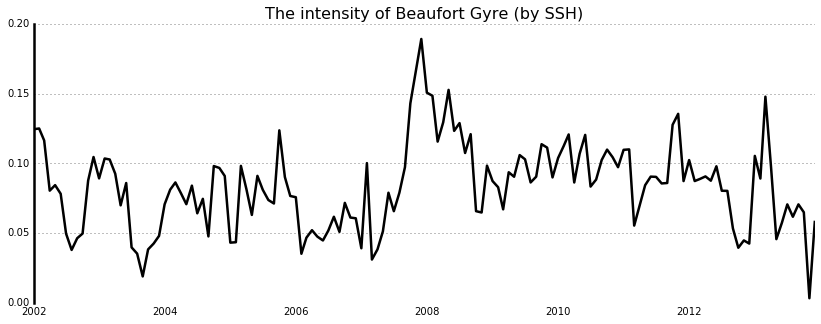

In [132]:
fig = plt.figure(figsize=(14, 5))
ax = fig.gca()

ax.grid(linestyle=':')
ax.xaxis.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False) 
ax.spines["right"].set_visible(False)
ax.set_xlim([date_list[0], date_list[143]])
#ax.set_ylim([0, 0.004])
[i.set_linewidth(2.5) for i in ax.spines.itervalues()] 
ax.tick_params(axis="both", which="both", bottom="off", top="off",    
            labelbottom="on", left="off", right="off", labelleft="on")

ax.plot(date_list, SSH_BG, 'k-', lw=2.5)
ax.set_title('The intensity of Beaufort Gyre (by SSH)', fontsize=16)

In [133]:
corrBG = np.zeros([233, 801])
pBG = np.zeros([233, 801])

for i in range(233):
    for j in range(801):
        corrBG[i, j], pBG[i, j]=pearsonr(slp_np[:, i, j], SSH_BG)

In [134]:
np.nanmax(corrBG)

0.39705378728403684

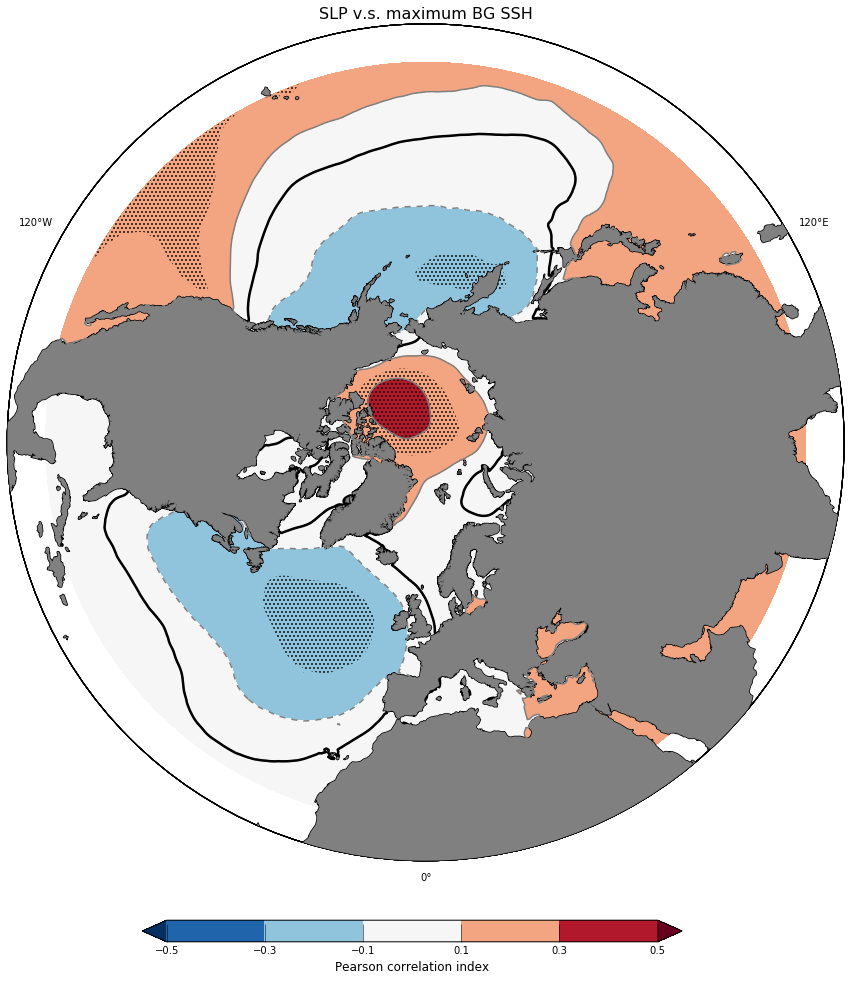

In [135]:
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=15, lon_0=0, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 120), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None, zorder=4)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y = proj(lon_np, lat_np)
CS = proj.contourf(x, y, corrBG, lev_corr, cmap=plt.cm.RdBu_r, extend='both')
proj.contour(x, y, corrBG, lev_corr_line, colors=('gray',), linewidths=1.5)
proj.contour(x, y, corrBG, [0], colors=('k',), linewidths=2.5)
proj.contourf(x, y, pBG, [0.01, 0.1], colors='none', hatches=['...', ''], extend='min')

cax  = fig.add_axes([0.25, 0.05, 0.5, 0.02])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('Pearson correlation index', fontsize=12)
CBar.ax.tick_params(axis='x', length=18)
CBar.set_ticks(lev_corr)

ax.set_title('SLP v.s. maximum BG SSH', fontsize=16)

In [136]:
corrBaBG = np.zeros([450, 544])
pBaBG = np.zeros([450, 544])
for i in range(450):
    for j in range(544):
        corrBaBG[i, j], pBaBG[i, j]=pearsonr(Ba_np[:, i, j], SSH_BG[:])

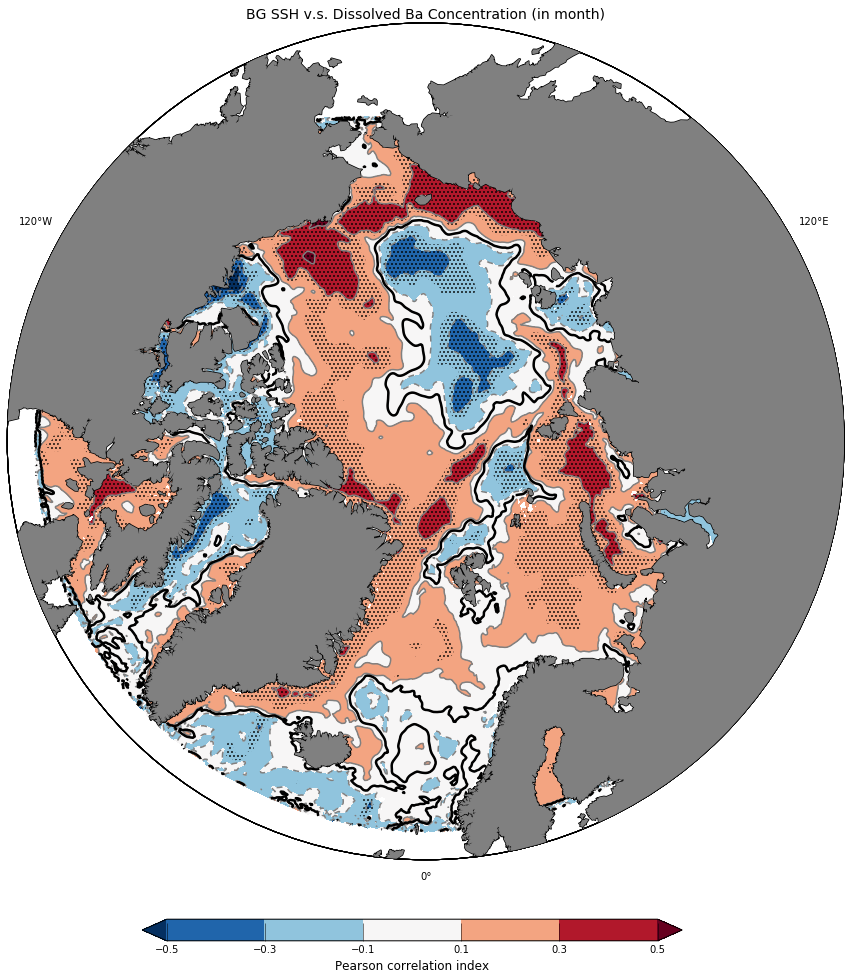

In [138]:
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=58, lon_0=0, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 120), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None, zorder=4)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y = proj(nav_lon, nav_lat)
CS = proj.contourf(x[350:, :], y[350:, :], corrBaBG, lev_corr, cmap=plt.cm.RdBu_r, extend='both')
proj.contour(x[350:, :], y[350:, :], corrBaBG, lev_corr_line, colors=('gray',), linewidths=1.5)
proj.contour(x[350:, :], y[350:, :], corrBaBG, [0], colors=('k',), linewidths=2.5)
proj.contourf(x[350:, :], y[350:, :], pBaBG, [0.01, 0.1], colors='none', hatches=['...', ''], extend='min')

cax  = fig.add_axes([0.25, 0.05, 0.5, 0.02])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('Pearson correlation index', fontsize=12)
CBar.ax.tick_params(axis='x', length=18)
CBar.set_ticks(lev_corr)

ax.set_title('BG SSH v.s. Dissolved Ba Concentration (in month)', fontsize=14)

In [139]:
pearsonr(SSH_BG,TF_FS_s)

(0.13663680842147577, 0.10246482104639063)

In [140]:
pearsonr(SSH_BG,TF_BB_s)

(-0.31880329158298304, 9.8436262296201961e-05)